# Computational Biology - Post Training Qualification 🧬🧬

## 0. Import Library

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight, MeltingTemp
from Bio import pairwise2
import matplotlib.pyplot as plt
import random
from Levenshtein import distance

c:\Users\ASUS\xStyNWx\Documents\Software Master\Computational Biology\environments\compbio\Lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## 1. Sequence Iterator and Record

In [2]:
iterator = SeqIO.parse('../02. SequenceSet/sequence2.fasta', 'fasta')
print (type(iterator))

<class 'Bio.SeqIO.FastaIO.FastaIterator'>


In [3]:
for i in iterator:
    print(i)

ID: CG891703.1
Name: CG891703.1
Description: CG891703.1 Ygmt330P6 Yunnan snub-nosed monkey genomic BAC library Rhinopithecus bieti genomic clone 330P6, genomic survey sequence
Number of features: 0
Seq('TTTCTGCCAGGACTCTTGATGATGTGCGGTTTGCTTTCAGGGATAGGAAGATAA...TCA')


In [4]:
record1 = SeqIO.read('../02. SequenceSet/sequence1.fasta', 'fasta')
print(record1.seq)

record2 = SeqIO.read('../02. SequenceSet/sequence2.fasta', 'fasta')
print(record2.seq)

TAAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAATACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCAGACAAGAGAATAATGGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTTTGGAGCAAGACAAATGATGCTGGATCGGACAGGGTGATGGTGTCTCCCCTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTACAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGTTGAAAGGTTAAAACATGGAACCTTCGGTCCCGTTCATTTCCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCGGGCCACGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCGCAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAGATTGCTCCTTTAATGGTGGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAGGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTTAGAAATGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAATCCAACTGAGGAACAAGCTGTGGATATATGCAAAGCAGCAATGGGTTTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGAACAAGTGGATCATCCGTCAAGAA

## 2. Store Sequence A and Sequence B

In [5]:
sequence_A = record1.seq
sequence_B = record2.seq

In [6]:
print(sequence_A)
print(sequence_B)

TAAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAATACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCAGACAAGAGAATAATGGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTTTGGAGCAAGACAAATGATGCTGGATCGGACAGGGTGATGGTGTCTCCCCTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTACAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGTTGAAAGGTTAAAACATGGAACCTTCGGTCCCGTTCATTTCCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCGGGCCACGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCGCAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAGATTGCTCCTTTAATGGTGGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAGGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTTAGAAATGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAATCCAACTGAGGAACAAGCTGTGGATATATGCAAAGCAGCAATGGGTTTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGAACAAGTGGATCATCCGTCAAGAA

## 3. Combine Seq A and Seq B to Seq C

In [7]:
sequence_C = sequence_A[:15] + sequence_B[:30]
print(sequence_C)

TAAGAGATCTAATGTTTTCTGCCAGGACTCTTGATGATGTGCGGT


## 4. String Manipulation

In [8]:
# 5 String Manipulation Function

def sequence_length(seq):
    return len(seq)

def reverse_sequence(seq):
    return seq[::-1]

def split_sequence(seq, n):
    return [seq[i:i + n] for i in range(0, len(seq), n)]

def nucleotide_at_index(seq, index):
    return seq[index] if index < len(seq) else "Index out of range"

def count_substring(seq, substring):
    return seq.count(substring)


## 5. Melting Temperature

In [9]:
# Calculate Melting Temperature using GC Content Percentage, Wallace's Rule, Nearest Neighbours Thermodynamics

def melting_temp(seq):
    A = seq.count("A")
    T = seq.count("T")
    G = seq.count("G")
    C = seq.count("C")
    return 2 * (A + T) + 4 * (G + C)


def wallaces_rule_tm(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    tm = 64.9 + 41 * (gc_count - 16.4) / len(sequence)
    return tm


def nearest_neighbor_tm(sequence, oligo_conc=50e-9):
    tm = MeltingTemp.Tm_NN(sequence, dnac1=oligo_conc)
    return tm

# I chose GC Content Percentage

## 6. Molecular Weight

In [10]:
def calculate_molecular_weight(seq):
    return molecular_weight(seq, seq_type='DNA')

## 7. Display GC & AT content percentage

In [11]:
def gc_content_percentage(seq):
    G = seq.count("G")
    C = seq.count("C")
    return (G + C) / len(seq) * 100

def at_content_percentage(seq):
    A = seq.count("A")
    T = seq.count("T")
    return (A + T) / len(seq) * 100

## 8. Frequency for Each Nucleotide Bases (G, C, A, T) 

In [12]:
def nucleotide_frequency(seq):
    return {"A": seq.count("A"), "T": seq.count("T"), "G": seq.count("G"), "C": seq.count("C")}

## 9. Checkpoint I

In [13]:
sequences = {"Sequence A": sequence_A, "Sequence B": sequence_B, "Sequence C": sequence_C}

for name, seq in sequences.items():
    print(f"\n{name}:")
    print(f"Sequence: {seq}")
    print(f"Length: {sequence_length(seq)}")
    print(f"Reversed: {reverse_sequence(seq)}")
    print(f"Split (5 bases): {split_sequence(seq, 5)}")
    print(f"Nucleotide at index 10: {nucleotide_at_index(seq, 10)}")
    print(f"Count of 'AT': {count_substring(seq, 'AT')}")
    print(f"Melting Temperature: {melting_temp(seq)}°C")
    print(f"Molecular Weight: {calculate_molecular_weight(seq):.2f} g/mol")
    print(f"GC Content: {gc_content_percentage(seq):.2f}%")
    print(f"AT Content: {at_content_percentage(seq):.2f}%")
    print(f"Nucleotide Frequency: {nucleotide_frequency(seq)}")
    print("-"*50)


Sequence A:
Sequence: TAAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAATACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCAGACAAGAGAATAATGGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTTTGGAGCAAGACAAATGATGCTGGATCGGACAGGGTGATGGTGTCTCCCCTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTACAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGTTGAAAGGTTAAAACATGGAACCTTCGGTCCCGTTCATTTCCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCGGGCCACGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCGCAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAGATTGCTCCTTTAATGGTGGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAGGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTTAGAAATGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAATCCAACTGAGGAACAAGCTGTGGATATATGCAAAGCAGCAATGGGTTTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGA

## 10. Plot Molecular Weight

In [14]:
def plot_results():
    
    # Datas
    
    molecular_weights = [calculate_molecular_weight(sequence_A), calculate_molecular_weight(sequence_B),
                         calculate_molecular_weight(sequence_C)]

    gc_contents = [gc_content_percentage(sequence_A), gc_content_percentage(sequence_B), gc_content_percentage(sequence_C)]
    at_contents = [at_content_percentage(sequence_A), at_content_percentage(sequence_B), at_content_percentage(sequence_C)]

    frequencies_A = nucleotide_frequency(sequence_A)
    frequencies_B = nucleotide_frequency(sequence_B)
    frequencies_C = nucleotide_frequency(sequence_C)

    # Molecular Weight Plot

    plt.figure(figsize=(8, 4))
    plt.bar(["Sequence A", "Sequence B", "Sequence C"], molecular_weights, color=['red', 'green', 'blue'])
    plt.title("Molecular Weight")
    plt.ylabel("Weight (g/mol)")
    plt.show()

    # GC Content and AT Content Plot

    plt.figure(figsize=(8, 4))
    x_labels = ["GC Content", "AT Content"]
    x_pos = range(len(x_labels))

    plt.bar([pos - 0.2 for pos in x_pos], [gc_contents[0], at_contents[0]], width=0.2, label="Sequence A", color='red')
    plt.bar(x_pos, [gc_contents[1], at_contents[1]], width=0.2, label="Sequence B", color='green')
    plt.bar([pos + 0.2 for pos in x_pos], [gc_contents[2], at_contents[2]], width=0.2, label="Sequence C", color='blue')
    plt.xticks(x_pos, x_labels)
    plt.title("GC & AT Content Percentage")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.show()

    # Nucleotide Frequency Plot

    plt.figure(figsize=(8, 4))
    bar_width = 0.25
    index = range(len(frequencies_A))

    plt.bar(index, list(frequencies_A.values()), bar_width, label="Sequence A", color='red')
    plt.bar([i + bar_width for i in index], list(frequencies_B.values()), bar_width, label="Sequence B", color='green')
    plt.bar([i + 2 * bar_width for i in index], list(frequencies_C.values()), bar_width, label="Sequence C", color='blue')

    plt.xticks([i + bar_width for i in index], frequencies_A.keys())
    plt.title("Nucleotide Frequency")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

## 11. mRNA Transcription & Amino Acid Translation

In [15]:
def transcribe_and_translate(seq):
    dna_seq = Seq(seq)
    mrna_seq = dna_seq.transcribe()
    protein_seq = mrna_seq.translate()
    return str(mrna_seq), str(protein_seq)

## 12. Alignment Simulation & Sequence Comparison

In [16]:
def generate_random_sequence(length):
    return ''.join(random.choices("GCTA", k=length))

def compare_sequences(seq1, seq2):
    return distance(seq1, seq2)

def local_alignment(seq1, seq2):
    alignments = pairwise2.align.localms(seq1, seq2, 2, -1, -0.5, -0.1)
    return alignments[0].score if alignments else 0

## 13. Generate Random: Sequence D

In [17]:
# Generate Sequence D
sequence_D = generate_random_sequence(45)

# Compare Sequence D with A and B (Bonus with  Sequence C also)

sequence_A_first45 = sequence_A[:45]
sequence_B_first45 = sequence_B[:45]
sequence_C_first45 = sequence_C[:45]

levenshtein_A = compare_sequences(sequence_D, sequence_A_first45)
levenshtein_B = compare_sequences(sequence_D, sequence_B_first45)
levenshtein_C = compare_sequences(sequence_D, sequence_C_first45)

alignment_score_A = local_alignment(sequence_D, sequence_A_first45)
alignment_score_B = local_alignment(sequence_D, sequence_B_first45)
alignment_score_C = local_alignment(sequence_D, sequence_C_first45)

## 14. Result I: Sequence A, B, and C Details

In [18]:
# Results for all sequences
sequences = {"Sequence A": sequence_A, "Sequence B": sequence_B, "Sequence C": sequence_C}

for name, seq in sequences.items():
    print(f"\n{name}:")
    print(f"Sequence: {seq}")
    print(f"Length: {sequence_length(seq)}")
    print(f"Reversed: {reverse_sequence(seq)}")
    print(f"Split (5 bases): {split_sequence(seq, 5)}")
    print(f"Nucleotide at index 10: {nucleotide_at_index(seq, 10)}")
    print(f"Count of 'AT': {count_substring(seq, 'AT')}")
    print(f"Melting Temperature: {melting_temp(seq)}°C")
    print(f"Molecular Weight: {calculate_molecular_weight(seq):.2f} g/mol")
    print(f"GC Content: {gc_content_percentage(seq):.2f}%")
    print(f"AT Content: {at_content_percentage(seq):.2f}%")
    print(f"Nucleotide Frequency: {nucleotide_frequency(seq)}")
    mrna, protein = transcribe_and_translate(seq)
    print(f"mRNA Transcription: {mrna}")
    print(f"Protein Translation: {protein}")
    print("-"*50)



Sequence A:
Sequence: TAAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAATACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCAGACAAGAGAATAATGGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTTTGGAGCAAGACAAATGATGCTGGATCGGACAGGGTGATGGTGTCTCCCCTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTACAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGTTGAAAGGTTAAAACATGGAACCTTCGGTCCCGTTCATTTCCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCGGGCCACGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCGCAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAGATTGCTCCTTTAATGGTGGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAGGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTTAGAAATGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAATCCAACTGAGGAACAAGCTGTGGATATATGCAAAGCAGCAATGGGTTTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGA

c:\Users\ASUS\xStyNWx\Documents\Software Master\Computational Biology\environments\compbio\Lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


## 15. Result II: Comparison Between Sequence A, B, C with Sequence D

In [19]:
# Print comparison and alignment results
print(f"\nSequence D Comparison with Sequence A, B, and C: {sequence_D}")
print("-"*50+"\n")

print(f"Levenshtein Distance with Sequence A: {levenshtein_A}")
print(f"Levenshtein Distance with Sequence B: {levenshtein_B}")
print(f"Levenshtein Distance with Sequence C: {levenshtein_C}")
print("-"*50+"\n")

print(f"Alignment Score with Sequence A: {alignment_score_A}")
print(f"Alignment Score with Sequence B: {alignment_score_B}")
print(f"Alignment Score with Sequence C: {alignment_score_C}")
print("-"*50+"\n")


Sequence D Comparison with Sequence A, B, and C: TACATTGAGATCACCGGTAATTTGGACCGTTACCAGGATAACGCA
--------------------------------------------------

Levenshtein Distance with Sequence A: 24
Levenshtein Distance with Sequence B: 28
Levenshtein Distance with Sequence C: 25
--------------------------------------------------

Alignment Score with Sequence A: 51.49999999999998
Alignment Score with Sequence B: 46.49999999999999
Alignment Score with Sequence C: 48.59999999999997
--------------------------------------------------



## 16. Plotting

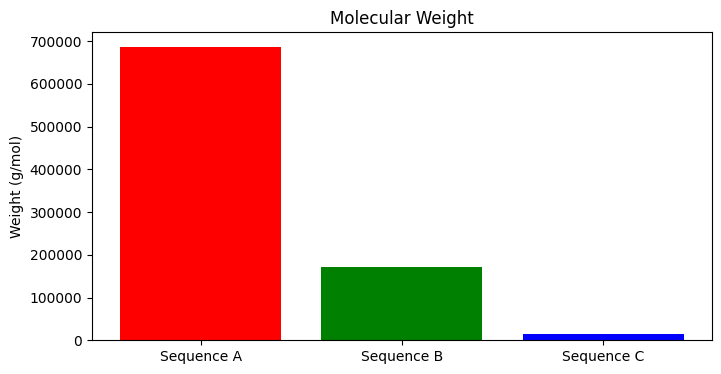

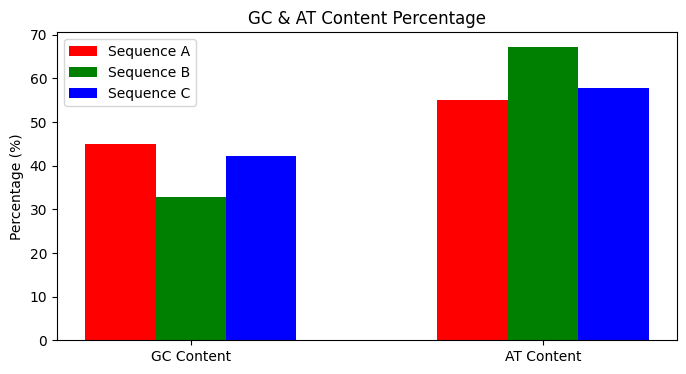

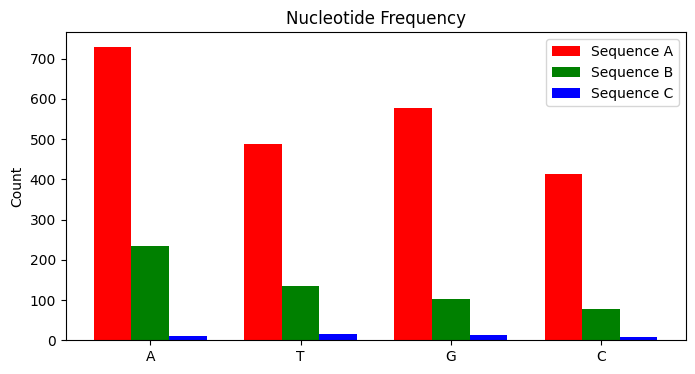

In [20]:
plot_results()

### Score Component
- Import Sequence from GenBank Files: Done
- Sequence String Manipulation: Done
- Sequence Analysis (Melting Temperature): Done
- Sequence Analysis (GC & AT Content): Done
- Sequence Analysis (Molecular Weight): Done
- Sequence Analysis (Nucleotides Base Frequency): Done
- Plotting: Done
- DNA, mRNA Protein Synthesis (Transcribe & Translate): Done

<code>Made By: NW25-1</code>